In [4]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [5]:
Airbnb_data = pd.read_csv('C:/Users/Mohammad/DataScienceCapstone/data1/Airbnb_data.csv')

In [6]:
Airbnb_data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,diff
0,0,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,82,30,89,2019-11-30,0.79,2,173,516.0
1,1,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,90,1,279,2020-12-06,2.44,6,352,144.0
2,2,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,28806,35.57864,-82.59578,Shared room,30,1,290,2020-11-01,2.78,6,0,179.0
3,3,160594,Historic Grove Park,769252,Elizabeth,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.51,1,0,2019.0
4,4,209068,Terrace Cottage,1029919,Kevin,28804,35.61856,-82.55276,Entire home/apt,134,30,56,2020-09-25,0.50,1,345,216.0


In [7]:
df = Airbnb_data.drop(['host_name','latitude','last_review','host_id','name','longitude'],axis =1)

In [8]:
#define the response variable


#Dummy feature creation
def dumdum(df, features_to_exclude):
    dfo = df.select_dtypes(include=['object'])
    du = pd.get_dummies(df.drop(features_to_exclude,axis =1))
    dfn = df.select_dtypes(exclude=['object'])
    df = dfn.merge(du,left_index=True,right_index=True)
    return df  

df1 = dumdum(df,['price'])

In [125]:
df1.head()

,Unnamed: 0_x,id_x,neighbourhood_x,price,minimum_nights_x,number_of_reviews_x,reviews_per_month_x,calculated_host_listings_count_x,availability_365_x,diff_x,...,minimum_nights_y,number_of_reviews_y,reviews_per_month_y,calculated_host_listings_count_y,availability_365_y,diff_y,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,108061,28801,82,30,89,0.79,2,173,505.0,...,30,89,0.79,2,173,505.0,1,0,0,0
1,1,155305,28806,90,1,279,2.44,6,352,133.0,...,1,279,2.44,6,352,133.0,1,0,0,0
2,2,156926,28806,30,1,290,2.78,6,0,168.0,...,1,290,2.78,6,0,168.0,0,0,0,1
3,3,160594,28801,125,30,58,0.51,1,0,2008.0,...,30,58,0.51,1,0,2008.0,0,0,1,0
4,4,209068,28804,134,30,56,0.50,1,345,205.0,...,30,56,0.50,1,345,205.0,1,0,0,0


In [9]:
df1.to_csv('C:/Users/Mohammad/DataScienceCapstone/data1/df1.csv')

In [126]:
Terrace_Cottage= df1[df1.id_x == 108061]

In [127]:
Terrace_Cottage.head()

,Unnamed: 0_x,id_x,neighbourhood_x,price,minimum_nights_x,number_of_reviews_x,reviews_per_month_x,calculated_host_listings_count_x,availability_365_x,diff_x,...,minimum_nights_y,number_of_reviews_y,reviews_per_month_y,calculated_host_listings_count_y,availability_365_y,diff_y,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,108061,28801,82,30,89,0.79,2,173,505.0,...,30,89,0.79,2,173,505.0,1,0,0,0


In [128]:
df1.head()

,Unnamed: 0_x,id_x,neighbourhood_x,price,minimum_nights_x,number_of_reviews_x,reviews_per_month_x,calculated_host_listings_count_x,availability_365_x,diff_x,...,minimum_nights_y,number_of_reviews_y,reviews_per_month_y,calculated_host_listings_count_y,availability_365_y,diff_y,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,108061,28801,82,30,89,0.79,2,173,505.0,...,30,89,0.79,2,173,505.0,1,0,0,0
1,1,155305,28806,90,1,279,2.44,6,352,133.0,...,1,279,2.44,6,352,133.0,1,0,0,0
2,2,156926,28806,30,1,290,2.78,6,0,168.0,...,1,290,2.78,6,0,168.0,0,0,0,1
3,3,160594,28801,125,30,58,0.51,1,0,2008.0,...,30,58,0.51,1,0,2008.0,0,0,1,0
4,4,209068,28804,134,30,56,0.50,1,345,205.0,...,30,56,0.50,1,345,205.0,1,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns='price'), 
                                                    df1.price, test_size=0.2, 
                                                    random_state=47)

In [26]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

Unnamed: 0_x                            1123.00
id_x                                29645512.50
neighbourhood_x                        28804.00
minimum_nights_x                           2.00
number_of_reviews_x                       43.00
reviews_per_month_x                        2.43
calculated_host_listings_count_x           1.00
availability_365_x                       169.00
diff_x                                   151.00
Unnamed: 0_y                            1123.00
id_y                                29645512.50
neighbourhood_y                        28804.00
minimum_nights_y                           2.00
number_of_reviews_y                       43.00
reviews_per_month_y                        2.43
calculated_host_listings_count_y           1.00
availability_365_y                       169.00
diff_y                                   151.00
room_type_Entire home/apt                  1.00
room_type_Hotel room                       0.00
room_type_Private room                  

In [27]:
#Code task 9#
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [28]:
#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [41]:
#regressor = RandomForestRegressor(n_estimators = 200, random_state = 20)
lm =  LinearRegression().fit(X_tr_scaled, y_train).fit(X_tr_scaled, y_train)

In [45]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [46]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.058326233402921424, 0.16398029134209458)

In [47]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(90.17188307431846, 83.15822162021952)

In [48]:
#Code task 13#
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(72759.21714549261, 17844.349620388286)

In [49]:
#Code task 14#
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

Unnamed: 0_x                        1.133109e+03
id_x                                2.848462e+07
neighbourhood_x                     2.879389e+04
minimum_nights_x                    4.781285e+00
number_of_reviews_x                 7.838095e+01
reviews_per_month_x                 2.913753e+00
calculated_host_listings_count_x    6.611849e+00
availability_365_x                  1.834064e+02
diff_x                              2.058361e+02
Unnamed: 0_y                        1.133109e+03
id_y                                2.848462e+07
neighbourhood_y                     2.879389e+04
minimum_nights_y                    4.781285e+00
number_of_reviews_y                 7.838095e+01
reviews_per_month_y                 2.913753e+00
calculated_host_listings_count_y    6.611849e+00
availability_365_y                  1.834064e+02
diff_y                              2.058361e+02
room_type_Entire home/apt           8.078627e-01
room_type_Hotel room                9.413068e-03
room_type_Private ro

In [50]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [51]:
lm =  LinearRegression().fit(X_tr_scaled, y_train).fit(X_tr_scaled, y_train)

In [52]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [53]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.058326233402921424, 0.16398029134209458)

In [54]:
#Code task 17#
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest( f_regression, k=15),
    LinearRegression()
)

In [55]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x00000218B2569280>)),
                ('linearregression', LinearRegression())])

In [56]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [57]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.05679865619742874, 0.16459416132324478)

In [58]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(90.59490316219832, 82.9275624916972)

In [59]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [60]:
cv_scores = cv_results['test_score']
cv_scores

array([0.20923753, 0.02113908, 0.12605942, 0.09170338, 0.084878  ])

In [61]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [66]:
RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=47))])

In [70]:
y_tr_pred = RF_pipe.predict(X_train)
y_te_pred = RF_pipe.predict(X_test)

In [71]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8865907970530009, -2.3807249163247617)

In [72]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(30.70235326688815, 84.47263274336284)

In [73]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train ,y_train, cv=5)

In [74]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([ 0.20285541,  0.11296329, -1.03973923, -0.41026269, -1.67143884])

In [75]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.5611244120971144, 0.7103082336014571)

In [65]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [76]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe,param_grid=grid_params, cv=5, n_jobs=-1)

In [77]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [78]:
#Code task 26#
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 10,
 'simpleimputer__strategy': 'median',
 'standardscaler': None}

In [80]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([ 0.31848212,  0.10128259, -0.76598349, -0.33288772,  0.0149637 ])

In [81]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(-0.13282856122463552, 0.3798001437563867)

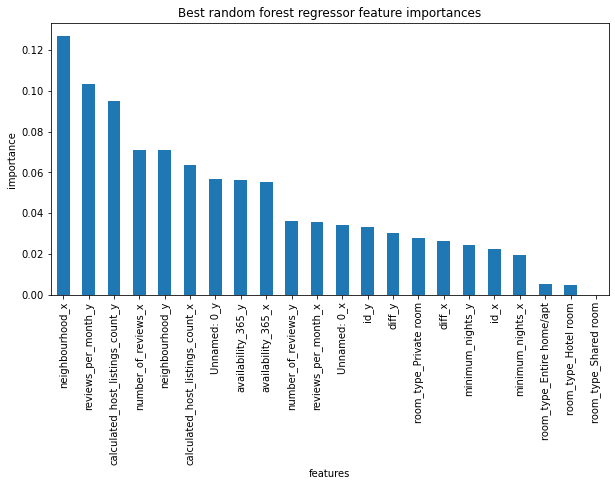

In [82]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [83]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()
    
modelpath = 'C:/Users/Mohammad/DataScienceCapstone/models'
if not os.path.exists(modelpath):
    os.mkdir(modelpath)
skimodel_path = os.path.join(modelpath, 'df_pricing.pkl')
if not os.path.exists(skimodel_path):
    with open(skimodel_path, 'wb') as f:
        pickle.dump(best_model, f)